In [1]:
%matplotlib inline
import os, sys, inspect, io, pickle
import matplotlib.pyplot as plt
from math import floor
import keypoint_helpers
import state_helpers

cmd_folder = os.path.realpath(
    os.path.dirname(
        os.path.abspath(os.path.split(inspect.getfile( inspect.currentframe() ))[0])))

if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)
    
with open('test.pickle', 'rb') as handle:
    kpts = pickle.load(handle)
    
from transitions import *
from transitions.extensions import GraphMachine
from IPython.display import Image, display, display_png

class Matter(object):
    def is_valid(self):
        return True
    
    def is_not_valid(self):
        return False
    
    def is_also_valid(self):
        return True
    
    # graph object is created by the machine
    def show_graph(self, **kwargs):
        stream = io.BytesIO()
        self.get_graph(**kwargs).draw(stream, prog='dot', format='png')
        display(Image(stream.getvalue()))

In [2]:
kpts_inverted = state_helpers.invert_keypoints(kpts)

In [3]:
%%capture
keypoints = keypoint_helpers.get_keypoint_labels()

fig, axes = plt.subplots(9, 2,figsize=(5,30))
fig.tight_layout()
flat_axes = [item for sublist in axes for item in sublist]

for i, ax in enumerate(flat_axes):
    ax.grid()
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    # add 1 to skip second plot
    if i == 0:
         ax.set_title(keypoints[i])
    elif i == 1:
        continue
    else:
        ax.set_title(keypoints[i-1])

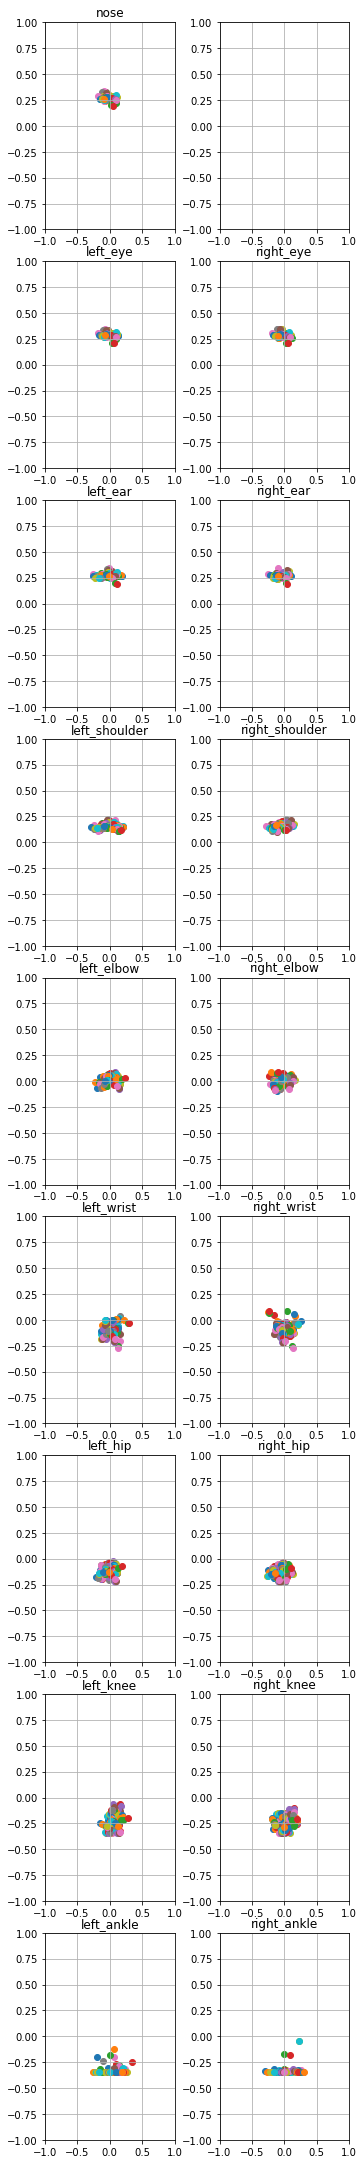

In [4]:
for frame in kpts_inverted:
    for i, point in enumerate(frame):
        # add 1 to skip second plot
        plot_index = i
        if i > 0:
            plot_index+=1
        flat_axes[plot_index].scatter(point[0],point[1])
fig

In [5]:
states= state_helpers.generate_states(len(kpts_inverted))
def generate_linear_triggers(states):
    transitions = []
    for i in range(len(states)):
        # if i is not last element
        if i != len(states)-1:
            transitions.append({ 'trigger': 't'+str(i), 'source': states[i], 'dest': states[i+1]})
    return transitions
transitions = generate_linear_triggers(states)

In [6]:
model = Matter()
machine = GraphMachine(model=model, 
                       states=states, 
                       transitions=transitions,
                       initial='State-0',
                       show_auto_transitions=False, # default value is False
                       title="test",
                       show_conditions=True)
#model.show_graph()


Exception: AGraph diagram requires pygraphviz